<a href="https://colab.research.google.com/github/zha70/zha70/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

img = cv2.imread('xray.jpeg')

In [2]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

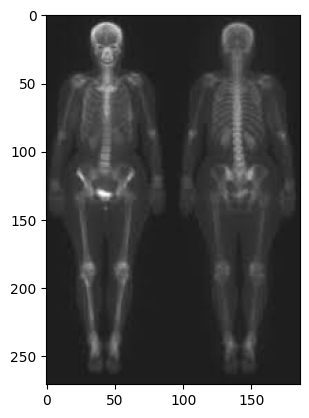

In [3]:

plt.imshow(img, cmap = 'gray')
plt.show()

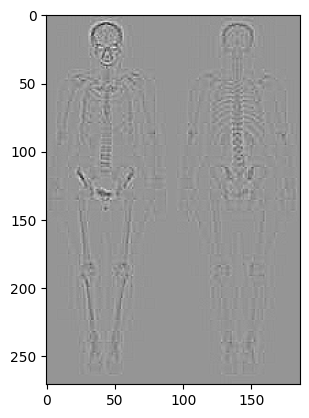

In [4]:

laplacian = cv2.Laplacian(gray,cv2.CV_64F)

plt.imshow(laplacian, cmap = 'gray')
plt.show()

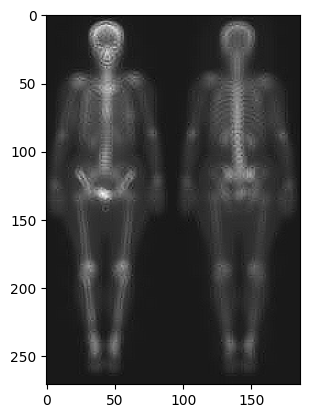

In [5]:

sharpened_img = gray + laplacian

plt.imshow(sharpened_img, cmap = 'gray')
plt.show()

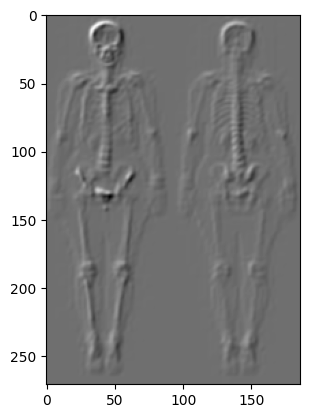

In [6]:

sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5) # x
sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5) # y

sobel_img = sobelx + sobely

plt.imshow(sobel_img, cmap = 'gray')
plt.show()

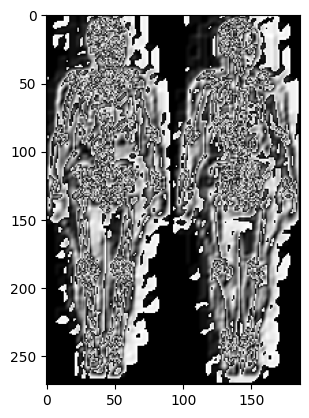

In [7]:

m, n = sobel_img.shape

mask = np.ones([5, 5], dtype = int)
mask = mask / 25

smoothed_sobel = np.zeros([m, n])

for i in range(1, m-1):
     for j in range(1, n-1):
         temp = sobel_img[i-1, j-1]*mask[0, 0]+sobel_img[i-1, j]*mask[0, 1]+sobel_img[i-1, j + 1]*mask[0, 2]+sobel_img[i, j-1]*mask[1, 0]+ sobel_img[i, j]*mask[1, 1]+sobel_img[i, j + 1]*mask[1, 2]+sobel_img[i + 1, j-1]*mask[2, 0]+sobel_img[i + 1, j]*mask[2, 1]+sobel_img[i + 1, j + 1]*mask[2, 2]

         smoothed_sobel[i, j]= temp

smoothed_sobel = smoothed_sobel.astype(np.uint8)

plt.imshow(smoothed_sobel, cmap = 'gray')
plt.show()

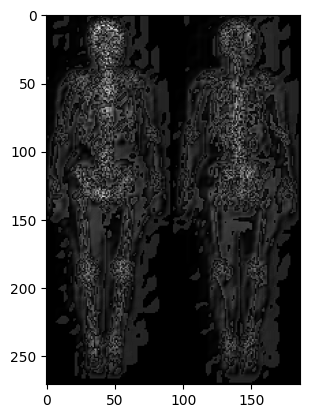

In [8]:

mask = sharpened_img * smoothed_sobel

plt.imshow(mask, cmap = 'gray')
plt.show()

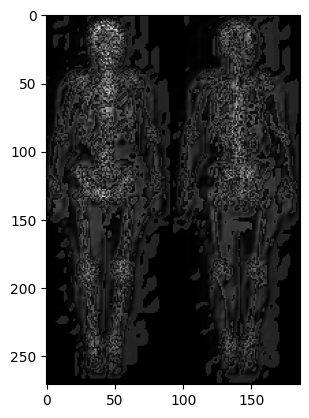

In [9]:

sharpened_img2 = sharpened_img + mask

plt.imshow(sharpened_img2, cmap = 'gray')
plt.show()

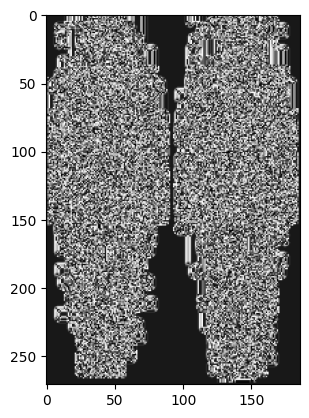

In [10]:

gamma = 1.1

gamma_corrected = np.array(255*(sharpened_img2 / 255) ** gamma, dtype = 'uint8')
plt.imshow(gamma_corrected, cmap='gray')
plt.show()